In [113]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
'''Simulation of the OU process and its analytic time reversal. Following 
https://math.stackexchange.com/questions/4707578/time-reversal-of-an-ornstein-uhlenbeck-process
https://jiha-kim.github.io/posts/deriving-reverse-time-stochastic-differential-equations-sdes/
https://ludwigwinkler.github.io/blog/SimpleReverseSDE/
'''

#OU params and initial condition
theta = 2.
sigma = 0.1
X0 = 0.1 

rng = np.random.default_rng(0)

#Terminal time and discretization parameters
T = 1.
delta_t = 0.001
process_count = 100


#Time range
t_range = np.arange(0.,T + delta_t, delta_t)


In [115]:
'''Simulation of the forward OU process'''

fwd_OU = np.zeros((process_count,len(t_range)))
fwd_OU[:,0] = X0

for index in range(1,len(t_range)):
    fwd_OU[:,index] = fwd_OU[:,index - 1] -theta * fwd_OU[:,index - 1] * delta_t + sigma * rng.normal(0,np.sqrt(delta_t),size = (process_count,))


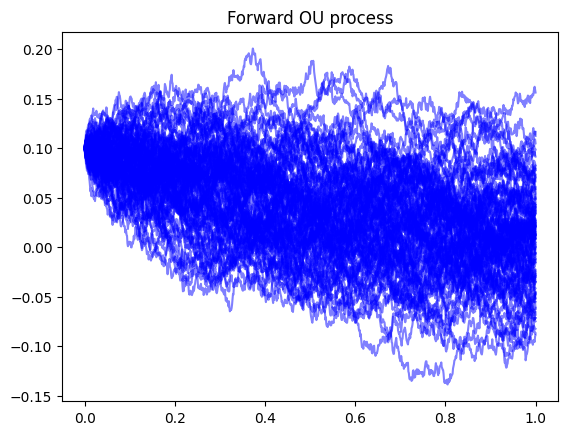

In [116]:
plt.title('Forward OU process')
plt.plot(t_range,fwd_OU.T,alpha = 0.5, color = 'blue')

In [117]:
'''Simulation of the backwards OU process'''

Y0 = fwd_OU[:,-1]

bckwrd_OU = np.zeros((process_count,len(t_range)))
bckwrd_OU[:,0] = Y0

for index in range(1,len(t_range)):
    t = t_range[index]
    bckwrd_OU[:,index] = bckwrd_OU[:,index - 1] + \
    (theta * bckwrd_OU[:,index - 1] - 2 * theta * (bckwrd_OU[:,index - 1] - X0 * np.exp(-theta * (1-t)))/(1 - np.exp(-2 * theta * (1 - t)))) * delta_t + \
    sigma * rng.normal(0,np.sqrt(delta_t),size = (process_count,))

/tmp/ipykernel_195992/3346658602.py:11: RuntimeWarning: divide by zero encountered in divide
  (theta * bckwrd_OU[:,index - 1] - 2 * theta * (bckwrd_OU[:,index - 1] - X0 * np.exp(-theta * (1-t)))/(1 - np.exp(-2 * theta * (1 - t)))) * delta_t + \


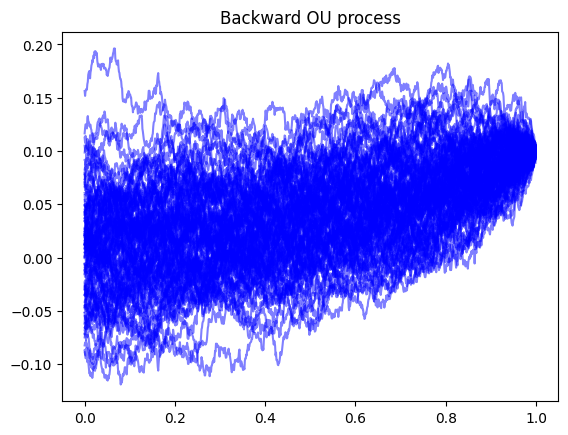

In [118]:
plt.title('Backward OU process')
plt.plot(t_range,bckwrd_OU.T,alpha = 0.5, color = 'blue')